In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from pprint import pprint

%matplotlib notebook

def values(array, name):
    def extract(run):
        #print(run)
        return float([l.split(":")[1].strip().split(" ")[0] for l in run if name in l][0])
    values = np.array([extract(run) for run in array])
    return values

def result(array):
    names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]
    return {n:values(array, n) for n in names}

with open("experiment1/results.txt", "r") as f:
    perfect = f.read()
    
perfect = perfect.split("#")
perfect = [a.split("\n") for a in perfect if a != '']
perfect = result(perfect)
    
def parse(file):
    with open(file, "r") as f:
        delay = f.read()
        delay = delay.split("DELAY")[1:]
        delay_result = {}
        for d in delay:
            dr = d.split("#")
            dv = float(dr[0].strip())
            dr = [a.split("\n") for a in dr[1:] if a != ''][:-1]
            dr = result(dr)

            delay_result[dv] = dr 
        return delay_result
    
d1 = parse("experiment2/results_final.txt")
d2 = parse("experiment3/results_final.txt")  

names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

t_fix, t_nonfix = [], []

for n in names:
    fig = plt.figure()
    fig.suptitle(n)
    def plot(delay_result, label):
        #print(delay_result)
        dx = np.array(list(delay_result.keys()))
        
        d = [mean_confidence_interval(d[n]) for d in delay_result.values()]
        d_mu = [i[0] for i in d]
        d_c1 = [i[1] for i in d]
        d_c2 = [i[2] for i in d]
        
        plt.plot(dx, d_mu, label=label)
        plt.fill_between(dx, d_c1, d_c2, alpha=0.5)
        return d_mu
    
    t_nonfix.append(plot(d1, label="non-fixated"))
    t_fix.append(plot(d2, label="fixated"))
    
    plt.hlines(perfect[n].mean(), 0, 4, label="perfect")
    plt.legend()
    plt.xlabel("delay")
    plt.ylabel("score")
    plt.savefig(n + ".png")
    
dx = np.array(list(d1.keys()))
d_nf = np.sum(t_nonfix, axis=0)
d_f = np.sum(t_fix, axis=0)

fig = plt.figure()
fig.suptitle("total")

plt.plot(dx, d_nf, label="non-fixated")
plt.plot(dx, d_f, label="fixated")
    

plt.legend()
plt.xlabel("delay")
plt.ylabel("score")

print(d_mu)
    
    

<IPython.core.display.Javascript object>


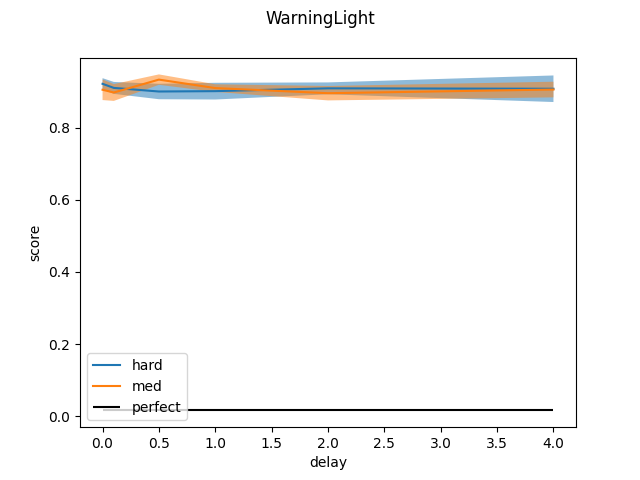

<IPython.core.display.Javascript object>


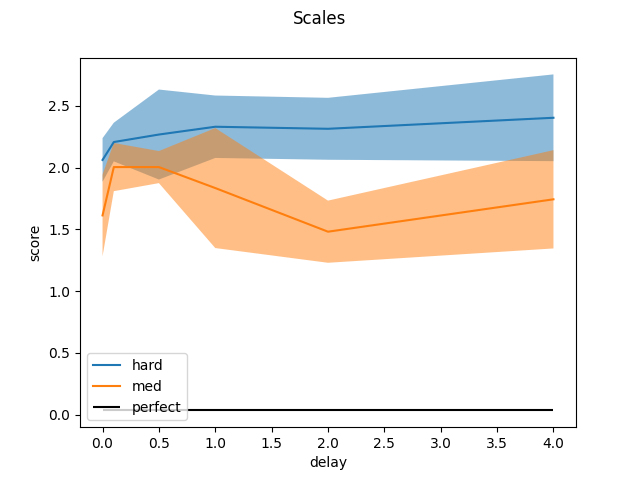

<IPython.core.display.Javascript object>


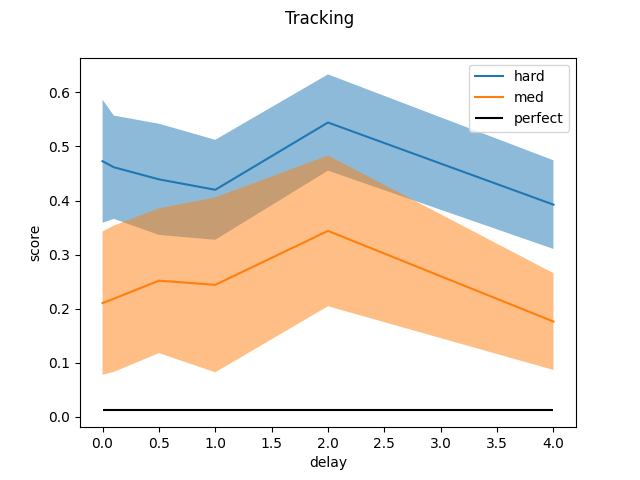

<IPython.core.display.Javascript object>


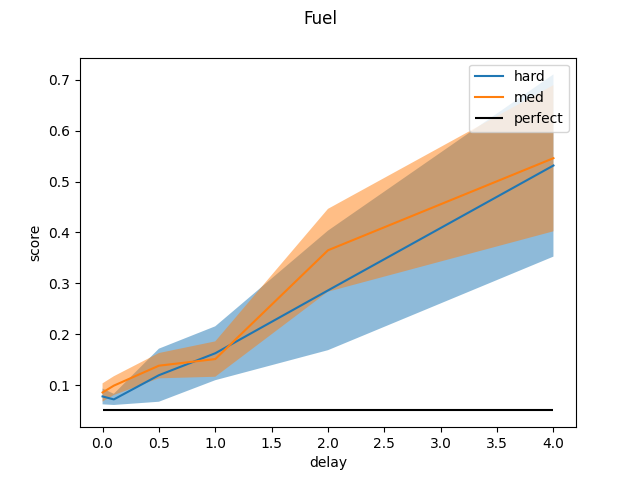

<IPython.core.display.Javascript object>


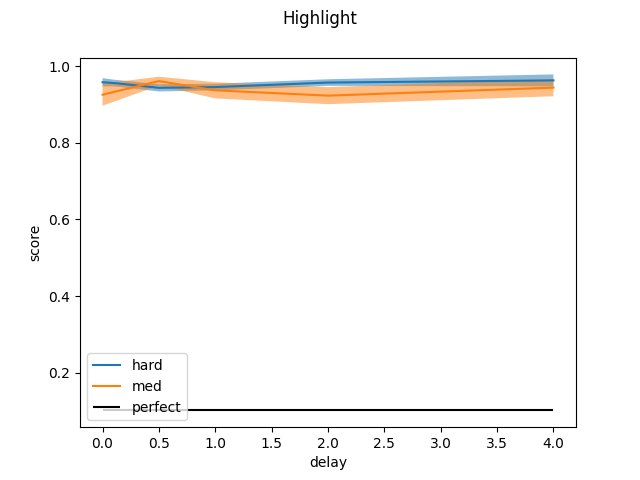

<IPython.core.display.Javascript object>


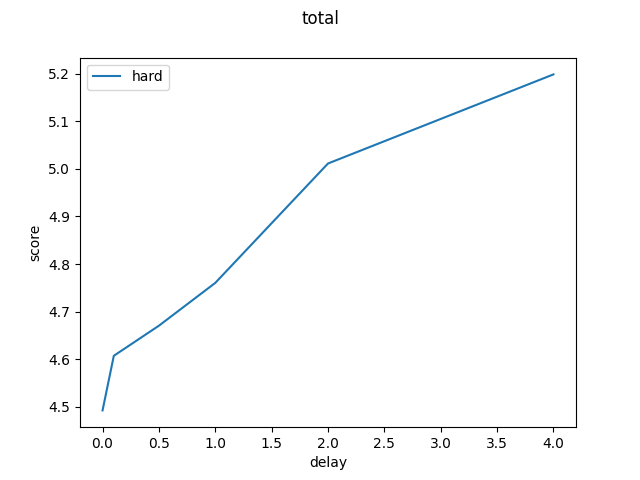

Text(0, 0.5, 'score')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from pprint import pprint

%matplotlib notebook

def values(array, name):
    def extract(run):
        #print(run)
        return float([l.split(":")[1].strip().split(" ")[0] for l in run if name in l][0])
    values = np.array([extract(run) for run in array])
    return values

def result(array):
    names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]
    return {n:values(array, n) for n in names}

with open("experiment1/results.txt", "r") as f:
    perfect = f.read()
    
perfect = perfect.split("#")
perfect = [a.split("\n") for a in perfect if a != '']
perfect = result(perfect)
    
def parse(file):
    with open(file, "r") as f:
        delay = f.read()
        delay = delay.split("DELAY")[1:]
        delay_result = {}
        for d in delay:
            dr = d.split("#")
            dv = float(dr[0].strip())
            dr = [a.split("\n") for a in dr[1:] if a != ''][:-1]
            dr = result(dr)

            delay_result[dv] = dr 
        return delay_result
    
d1 = parse("experiment4/results-fuel-hard.txt")
d2 = parse("experiment4/results-fuel-med.txt")
#d2 = parse("experiment4/results_final.txt")  

names = ["WarningLight", "Scales", "Tracking", "Fuel", "Highlight"]

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

t_hard, t_med, t_easy = [], [], []

for n in names:
    fig = plt.figure()
    fig.suptitle(n)
    def plot(delay_result, label):
        #print(delay_result)
        dx = np.array(list(delay_result.keys()))
        
        d = [mean_confidence_interval(d[n]) for d in delay_result.values()]
        d_mu = [i[0] for i in d]
        d_c1 = [i[1] for i in d]
        d_c2 = [i[2] for i in d]
        
        plt.plot(dx, d_mu, label=label)
        plt.fill_between(dx, d_c1, d_c2, alpha=0.5)
        return d_mu
    
    t_hard.append(plot(d1, label="hard"))
    t_med.append(plot(d2, label="med"))
        
    plt.hlines(perfect[n].mean(), 0, 4, label="perfect")
    plt.legend()
    plt.xlabel("delay")
    plt.ylabel("score")
    plt.savefig(n + ".png")
    
dx = np.array(list(d1.keys()))
d_nf = np.sum(t_hard, axis=0)

fig = plt.figure()
fig.suptitle("total")

plt.plot(dx, d_nf, label="hard")

plt.legend()
plt.xlabel("delay")
plt.ylabel("score")
    
    